In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob

In [2]:
pe_loops = {}
area = 7.8793 # in cm^2
thickness = 38.11 # in microns

os.chdir('/Users/bhasi/Documents/GitHub/PST_PE_Data/PE Select')
for file in np.sort(glob.glob('*.tab')):
    pe_loop = pd.read_csv(
    file, sep='\t', lineterminator='\n').drop(
        columns=['\r','2400_V','T0a_T','T0a_time']).rename(
            columns={'#2400_E':'Voltage', 
                        '2400_I':'Current', 
                        '2400_P':'Charge', 
                        '2400_time':'Time'})
      
    pe_loop['E-field'] = pe_loop['Voltage']/thickness # converts to V/um
    pe_loop['Polarization'] = 1E6*pe_loop['Charge']/area # converts to uC/cm^2
    pe_loop.drop(columns=['Voltage','Charge'],inplace=True)
    pe_loops[np.round(float(file.split('.tab')[0])).astype(int)] = pe_loop

Text(0, 0.5, 'Polarization ($\\mu$C/cm$^2$)')

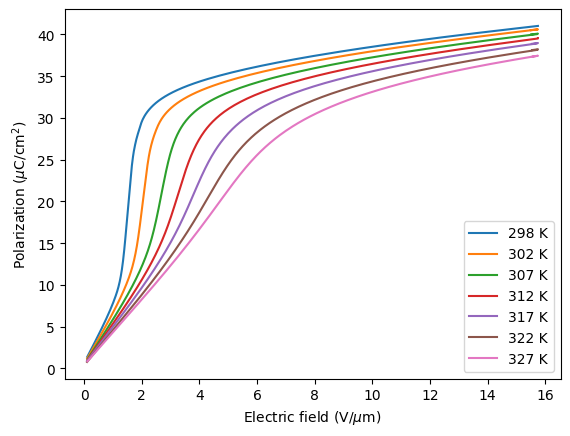

In [3]:
charging_current = 1E-5

for temperature, pe_loop in pe_loops.items():
    mask_plus = ((pe_loop['Current']-charging_current).abs()<1E-6)
    # finds index for field on in the minor loop
    start, end = mask_plus[mask_plus.astype(int).diff()==1].index[1],mask_plus[mask_plus.astype(int).diff()==-1].index[1]
    pe_field_on = pe_loop.loc[(pe_loop.index>=start) & (pe_loop.index<=end),:]

    plt.plot(pe_field_on['E-field'],pe_field_on['Polarization'],label=f"{temperature} K")

plt.legend()
plt.xlabel('Electric field (V/$\mu$m)')
plt.ylabel('Polarization ($\mu$C/cm$^2$)')